In [8]:
import os
import cv2
import numpy as np


dataset_path = "/home/basma/Plant_Disease/dataset_tomato/"
IMG_SIZE = 128

data = []
labels = []

classes = os.listdir(dataset_path)
classes.sort()

for i, cls in enumerate(classes):
    class_path = os.path.join(dataset_path, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img / 255.0

        data.append(img)
        labels.append(i)

data = np.array(data, dtype="float32")
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)
# print(labels[:999])

print("Number of classes:", len(classes))
print("Classes:", classes)

# print(np.unique(labels))






Data shape: (7223, 128, 128, 3)
Labels shape: (7223,)
Number of classes: 5
Classes: ['Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___healthy']


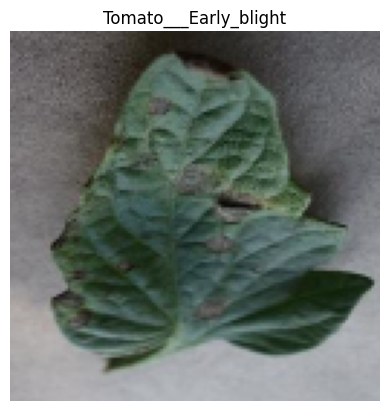

In [ ]:

# to test if the img are 128x128 and if all classes are loaded from 0 to 4

# import matplotlib.pyplot as plt
# index = 4
# plt.imshow(data[index])
# plt.title(classes[labels[index]])
# plt.axis("off")
# plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

data, labels = shuffle(data, labels, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(
    data, labels, test_size=0.30, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (5056, 128, 128, 3) (5056,)
Validation: (1083, 128, 128, 3) (1083,)
Test: (1084, 128, 128, 3) (1084,)


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 127008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │       635,045 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635,941 (2.43 MB)

 Trainable params: 635,941 (2.43 MB)

 Non-trainable params: 0 (0.00 B)